# **Lab Assignment 6**


---


<p> Name: Maharaj Hossain Tanim <br> ID: 2215151040 <br> Section: 7(A2) <br> Course: Simulation and Modeling Lab <br> Course Code: CSE 413</p>


---



In [38]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [39]:
#a. Simulating 60 Weeks and finding estimated order size. (Displaying Data/Calculation)
#b. Based on the simulation, finding out the average total cost of “having” the product.

def simulation(week):
    on_hand_options = [15, 25, 35, 40, 42, 55]
    probabilities = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

    num_order = 0;  # to store the sum of order quantities
    num_cost = 0; # to store the sum of costs

    for _ in range(week // 2):
        on_hand = random.choice(on_hand_options)
        order_quantity = random.choices(on_hand_options, probabilities)[0]

        cost_ordering = 50
        cost_purchase = order_quantity * 4
        cost_holding = on_hand * 4

        total_cost = cost_ordering + cost_purchase + cost_holding
        num_cost += total_cost
        num_order += order_quantity
    average_order_size = num_order / (week // 2)
    average_cost = num_cost / (week // 2)

    print("Average Order Size:", average_order_size)
    print("Average Cost:", average_cost)

#simulation with 60 weeks
simulation(60)


Average Order Size: 30.133333333333333
Average Cost: 291.6


Average Waiting Time: 26.5000359448818
Server Utilization: 0.06663291283448382
Average Queue Length: 26.766567596219744


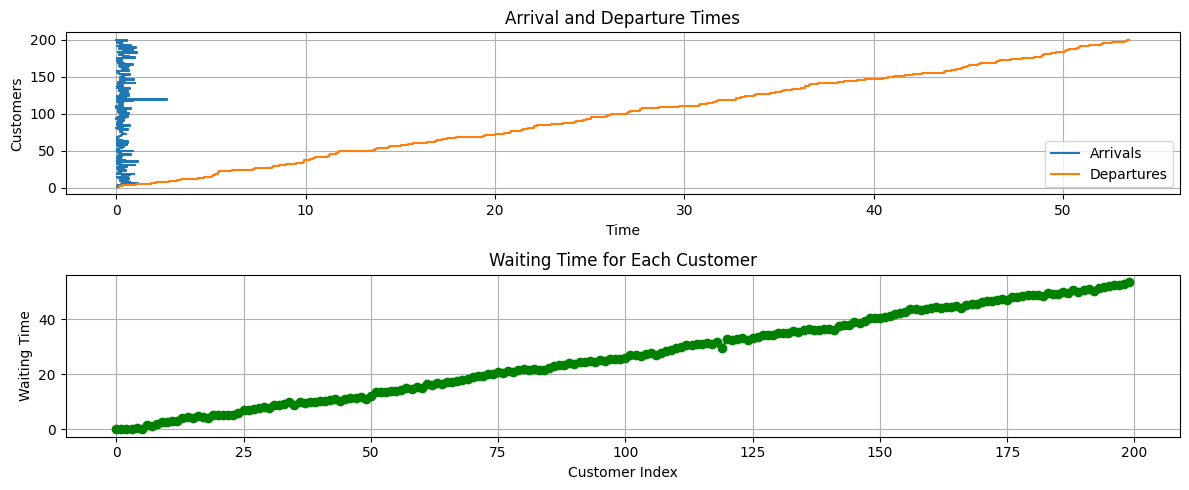

In [40]:
# 1. Perform a simulation for 200 customers with λ=3and μ=4. Calculate and compare the waiting time and server utilization.

# Step 1: Define parameters
lambda_rate = 3
mu_rate = 4
num_customers = 200

# Step 2: Generate times
inter_arrival_times = np.random.exponential(1/lambda_rate, num_customers)
arrival_times = np.random.exponential(1/lambda_rate, num_customers)
service_times = np.random.exponential(1/mu_rate, num_customers)

# Step 3: Initialize
start_times = np.zeros(num_customers)
end_times = np.zeros(num_customers)

start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

# Step 4: Simulate queue
for i in range(1, num_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

# Step 5: Calculate metrics
waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / (num_customers * mu_rate)
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(end_times - arrival_times)

# Step 6: Print results
print("Average Waiting Time:", avg_waiting_time)
print("Server Utilization:", server_utilization)
print("Average Queue Length:", avg_queue_length)

# Step 7: Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, num_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, num_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Arrival and Departure Times')

plt.subplot(2,1,2)
plt.plot(range(num_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Waiting Time for Each Customer')
plt.tight_layout()
plt.show()


Average Waiting Time: 6.162888488442311 units
Average Queue Length: 0.99 customers


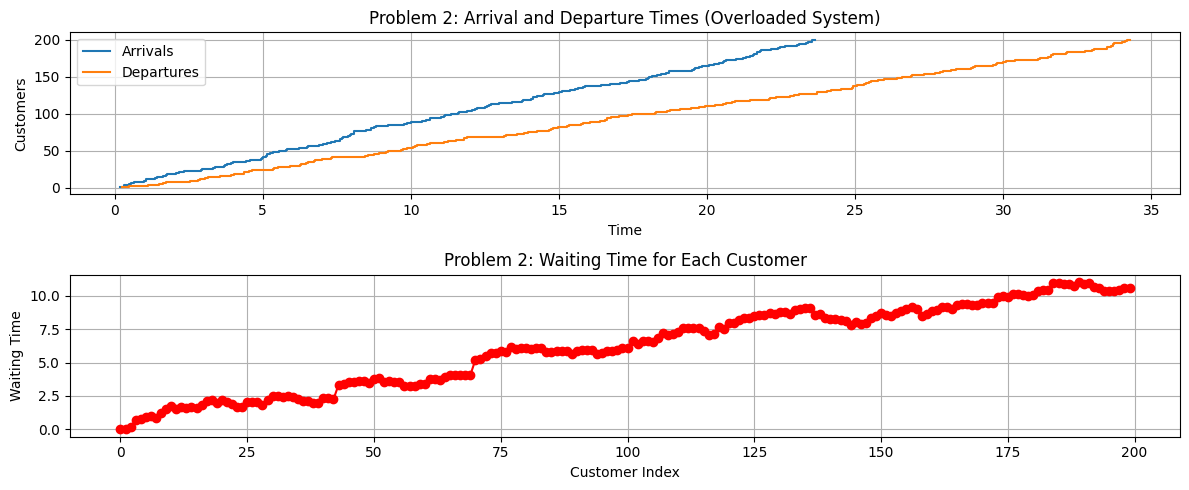

In [41]:
# 2.Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system performance.

# Step 1: Define parameters
lambda_rate = 8
mu_rate = 6
n_customers = 200

# Step 2: Generate times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

# Step 3: Initialize
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

# Step 4: Simulate queue
for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

# Step 5: Calculate metrics
waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

# Step 6: Print results
print(f"Average Waiting Time: {avg_waiting_time:} units")
print(f"Average Queue Length: {avg_queue_length:} customers")

# Step 7: Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 2: Arrival and Departure Times (Overloaded System)')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'ro-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 2: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()


Problem 3 (Limited Queue Capacity = 10):
Total Customers: 200
Accepted Customers: 184
Rejected Customers: 16
Server Utilization: 76.96720598423597%
Average Waiting Time: 3.4012196257574216 units
Average Queue Length: 0.8858695652173914 customers


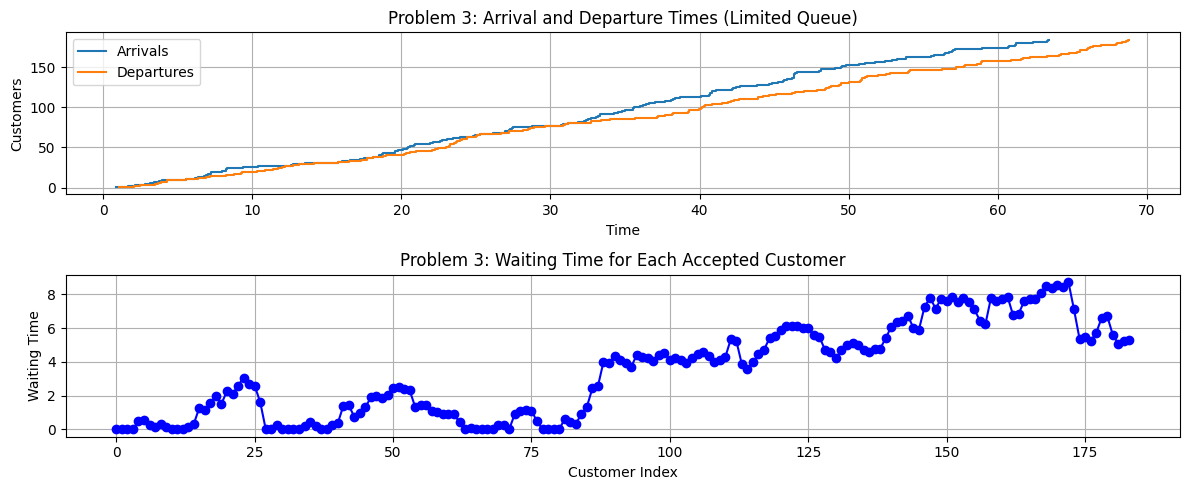

In [42]:
# 3.Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.

# Step 1: Define parameters
lambda_rate = 3
mu_rate = 4
n_customers = 200
queue_capacity = 10

# Step 2: Generate times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

# Step 3: Initialize
start_times = []
end_times = []
queue = []
rejected_customers = 0
server_available_time = 0

# Step 4: Simulate queue
for i in range(n_customers):
    arrival = arrival_times[i]
    service = service_times[i]

    queue = [end for end in queue if end > arrival]

    if len(queue) < queue_capacity:
        start_time = max(arrival, server_available_time)
        end_time = start_time + service
        server_available_time = end_time
        queue.append(end_time)
        start_times.append(start_time)
        end_times.append(end_time)
    else:
        rejected_customers += 1

# Step 5: Calculate metrics
waiting_times = np.array(start_times) - arrival_times[:len(start_times)]
server_utilization = np.sum(service_times[:len(end_times)]) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

# Step 6: Print results
print("Problem 3 (Limited Queue Capacity = 10):")
print(f"Total Customers: {n_customers}")
print(f"Accepted Customers: {len(end_times)}")
print(f"Rejected Customers: {rejected_customers}")
print(f"Server Utilization: {server_utilization*100:}%")
print(f"Average Waiting Time: {avg_waiting_time:} units")
print(f"Average Queue Length: {avg_queue_length:} customers")

# Step 7: Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times[:len(end_times)], np.arange(1, len(end_times)+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, len(end_times)+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 3: Arrival and Departure Times (Limited Queue)')

plt.subplot(2,1,2)
plt.plot(range(len(end_times)), waiting_times, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 3: Waiting Time for Each Accepted Customer')
plt.tight_layout()
plt.show()




---

